Names:  
1) Klaus Kades (Uni-id: fw448 Matrikelnr.: 3408463)

2) Lucas-Raphael Müller (Uni-id: al413 Matrikelnr.: 3205638)

3) Melanie Schellenberg (Uni-id: qh400 Matrikelnr.: 3146390)

4) Shuhan Xiao (Uni-id: kg410 Matrikelnr.: 3160697)

In [60]:
import pandas as pd 
import networkx as nx 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import numpy as np
!pip install python-igraph
import igraph as ig
from collections import Counter

# Assignment 6
## Problem 6-2 Friendship Paradox Follow-up

In [ ]:
!wget http://socialnetworks.mpi-sws.mpg.de/data/facebook-links.txt.gz --no-clobber
!gzip -d *.gz
!ls

--2021-12-08 15:08:06--  http://socialnetworks.mpi-sws.mpg.de/data/facebook-links.txt.gz
Resolving socialnetworks.mpi-sws.mpg.de (socialnetworks.mpi-sws.mpg.de)... 139.19.206.116
Connecting to socialnetworks.mpi-sws.mpg.de (socialnetworks.mpi-sws.mpg.de)|139.19.206.116|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://socialnetworks.mpi-sws.org/data/facebook-links.txt.gz [following]
--2021-12-08 15:08:07--  http://socialnetworks.mpi-sws.org/data/facebook-links.txt.gz
Resolving socialnetworks.mpi-sws.org (socialnetworks.mpi-sws.org)... 139.19.206.116
Reusing existing connection to socialnetworks.mpi-sws.mpg.de:80.
HTTP request sent, awaiting response... 200 OK
Length: 10429299 (9.9M) [application/x-gzip]
Saving to: ‘facebook-links.txt.gz’

facebook-links.txt. 100%[===================>]   9.95M  9.31MB/s    in 1.1s    

2021-12-08 15:08:08 (9.31 MB/s) - ‘facebook-links.txt.gz’ saved [10429299/10429299]

facebook-links.txt  sample_data


### clean data
1. remove timestamp column

In [ ]:
data = pd.read_csv('./facebook-links.txt', sep='\t', index_col=None, names=['source','target','time-stamp'])

display(data)

# remove time-stamp column
data = data.drop(columns=['time-stamp'])
display(data.head())

,source,target,time-stamp
0,1,2,\N
1,1,3,\N
2,1,4,\N
3,1,5,\N
4,1,6,\N
...,...,...,...
1545681,21169,12888,1201988286
1545682,21169,18660,1214804215
1545683,48809,24065,1210066726
1545684,48809,29258,1206011811


,source,target
0,1,2
1,1,3
2,1,4
3,1,5
4,1,6


2. turn into and undirected network

In [ ]:
G = nx.from_pandas_edgelist(data, source='source',target='target')
print(nx.info(G))
# convert to undirected graph
G = G.to_undirected()

Graph with 63731 nodes and 817090 edges


3. remove multiple edges

In [ ]:
G = nx.Graph(G) # multigraph to graph
print(nx.info(G))

Graph with 63731 nodes and 817090 edges


### 1. Compute the average number of friends and the average number of "friends of friends" (FOF).

In [ ]:
degrees = [val for (node, val) in G.degree()]
print(f"average #friends = {sum(degrees)/len(degrees)}")

average #friends = 25.641838351822503


In [ ]:
ndegrees_dict = nx.average_neighbor_degree(G)
ndegrees = list(ndegrees_dict.values())
print(f"average #friends-of-friends = {sum(ndegrees)/len(ndegrees)}")  

average #friends-of-friends = 58.36340280721295


In [ ]:
print(len(ndegrees))

63731


In [ ]:
type(nx.average_neighbor_degree(G))

dict

### 2. Create a plot showing the distribution of number of friends versus the number of FOF.



In [63]:
print(max(degrees), min(degrees))
print(max(ndegrees), min(ndegrees))
N = G.number_of_nodes()

1098 1
1098.0 1.0


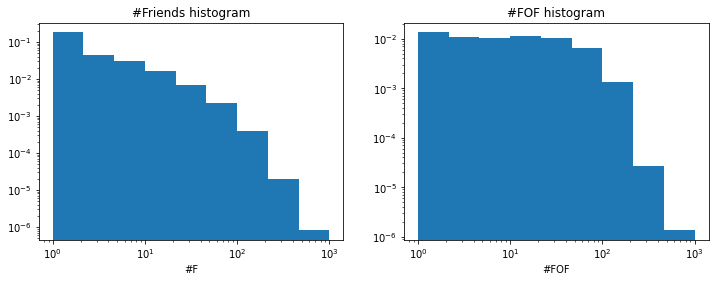

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(degrees, density=1, bins=np.logspace(np.log10(1),np.log10(1000), 10))
plt.title("#Friends histogram")
plt.xlabel("#F")
plt.xscale('log')
plt.yscale('log')
plt.subplot(1,2,2)
plt.hist(ndegrees, density=1, bins=np.logspace(np.log10(1),np.log10(1000), 10))
plt.title("#FOF histogram")
plt.xlabel("#FOF")
plt.xscale('log')
plt.yscale('log')


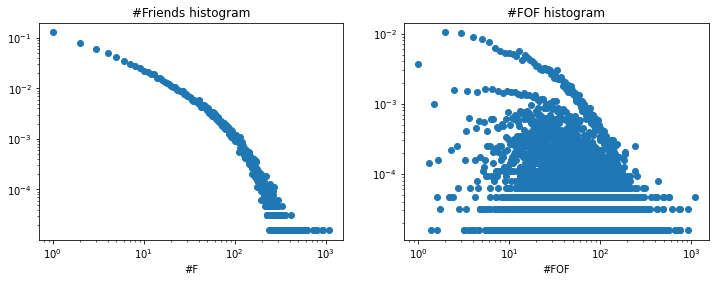

In [70]:
bdegree_counts = Counter(degrees)                                                                                                 
deg, counts = zip(*degree_counts.items())          

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(deg,[i/N for i in counts])
plt.title("#Friends histogram")
plt.xlabel("#F")
plt.xscale('log')
plt.yscale('log')

ndegree_counts = Counter(ndegrees)                                                                                                 
ndeg, ncounts = zip(*ndegree_counts.items())    

plt.subplot(1,2,2)
plt.scatter(ndeg,[i/N for i in ncounts])
plt.title("#FOF histogram")
plt.xlabel("#FOF")
plt.xscale('log')
plt.yscale('log')


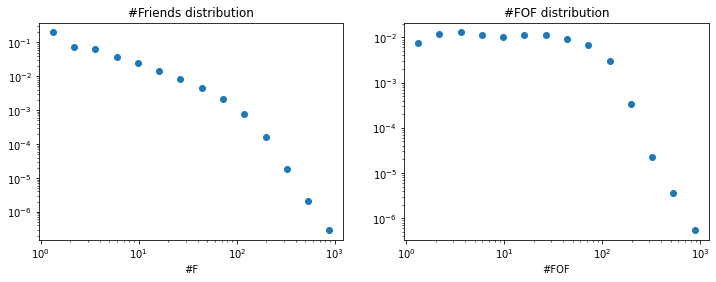

In [93]:
hist, bin_edges = np.histogram(degrees, density=True, bins=np.logspace(np.log10(1),np.log10(max(degrees)), 15))
bins_mean = [0.5 * (bin_edges[i] + bin_edges[i+1]) for i in range(len(bin_edges)-1)]                                                                                       
     

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(bins_mean, hist)
plt.title("#Friends distribution")
plt.xlabel("#F")
plt.xscale('log')
plt.yscale('log')

nhist, nbin_edges = np.histogram(ndegrees, density=True, bins=np.logspace(np.log10(1),np.log10(max(ndegrees)), 15))
nbins_mean = [0.5 * (nbin_edges[i] + nbin_edges[i+1]) for i in range(len(nbin_edges)-1)]                                                                                       
     

plt.subplot(1,2,2)
plt.scatter(nbins_mean, nhist)
plt.title("#FOF distribution")
plt.xlabel("#FOF")
plt.xscale('log')
plt.yscale('log')


### 3. Barabási-Albert Model




In [94]:
n = 10000
m = 7

Gba = nx.barabasi_albert_graph(n=10000,m=7)

In [95]:
degreesba = [val for (node, val) in Gba.degree()]
print(f"average #friends (BA model) = {sum(degreesba)/len(degreesba)}")
ndegrees_dictba = nx.average_neighbor_degree(Gba)
ndegreesba = list(ndegrees_dictba.values())
print(f"average #friends-of-friends (BA model) = {sum(ndegreesba)/len(ndegreesba)}")  

average #friends = 13.9902
average #friends-of-friends = 37.40788790769481


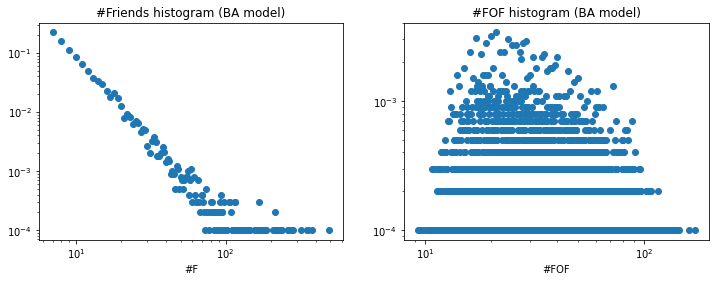

In [101]:
degree_counts = Counter(degreesba)                                                                                                 
deg, counts = zip(*degree_counts.items())          

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(deg,[i/n for i in counts])
plt.title("#Friends histogram (BA model)")
plt.xlabel("#F")
plt.xscale('log')
plt.yscale('log')

ndegree_counts = Counter(ndegreesba)                                                                                                 
ndeg, ncounts = zip(*ndegree_counts.items())    

plt.subplot(1,2,2)
plt.scatter(ndeg,[i/n for i in ncounts])
plt.title("#FOF histogram (BA model)")
plt.xlabel("#FOF")
plt.xscale('log')
plt.yscale('log')


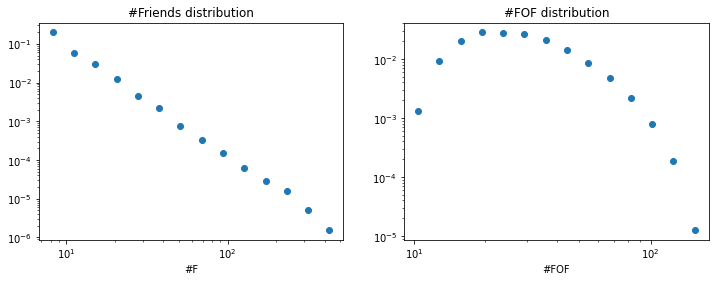

In [109]:
hist, bin_edges = np.histogram(degreesba, density=True, bins=np.logspace(np.log10(min(degreesba)),np.log10(max(degreesba)), 15))
bins_mean = [0.5 * (bin_edges[i] + bin_edges[i+1]) for i in range(len(bin_edges)-1)]                                                                                       
     

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(bins_mean, hist)
plt.title("#Friends distribution")
plt.xlabel("#F")
plt.xscale('log')
plt.yscale('log')

nhist, nbin_edges = np.histogram(ndegreesba, density=True, bins=np.logspace(np.log10(min(ndegreesba)),np.log10(max(ndegreesba)), 15))
nbins_mean = [0.5 * (nbin_edges[i] + nbin_edges[i+1]) for i in range(len(nbin_edges)-1)]                                                                                       
     

plt.subplot(1,2,2)
plt.scatter(nbins_mean, nhist)
plt.title("#FOF distribution")
plt.xlabel("#FOF")
plt.xscale('log')
plt.yscale('log')